In [2]:
import numpy as np
import mesa_reader as mr
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import matplotlib.ticker as ticker
import pandas as pd
import scipy

import scienceplots
plt.style.use('science')

plt.rcParams.update({'font.size': 11})

# Load Data

In [3]:
h = mr.MesaData("8Msol_new/LOGS/history.data") # change to your path

df_h = pd.DataFrame({col: h.data(f"{col}") for col in h.bulk_names}) # make to a DataFrame for convenience

In [4]:
df_h.head()

,model_number,num_zones,star_age,log_dt,star_mass,log_xmstar,log_abs_mdot,mass_conv_core,conv_mx1_top,conv_mx1_bot,...,center_he4,center_c12,center_o16,surface_c12,surface_o16,total_mass_h1,total_mass_he4,num_retries,num_backups,num_iters
0,1,455,0.000010,-5.000000,8.655,34.235946,-99.0,0.000582,0.999956,0.000240,...,0.27997,0.003442,0.00936,0.003442,0.00936,6.0585,2.423142,0,0,3
1,5,455,0.000074,-4.683275,8.655,34.235946,-99.0,0.000582,0.999956,0.000240,...,0.27997,0.003442,0.00936,0.003442,0.00936,6.0585,2.423142,0,0,3
2,10,453,0.000260,-4.287369,8.655,34.235946,-99.0,0.000581,0.999958,0.000240,...,0.27997,0.003442,0.00936,0.003442,0.00936,6.0585,2.423142,0,0,3
3,15,452,0.000720,-3.891463,8.655,34.235946,-99.0,0.000578,0.999960,0.000240,...,0.27997,0.003442,0.00936,0.003442,0.00936,6.0585,2.423142,0,0,3
4,20,451,0.001867,-3.495556,8.655,34.235946,-99.0,0.000562,0.999969,0.000242,...,0.27997,0.003442,0.00936,0.003442,0.00936,6.0585,2.423142,0,0,3


# Q.2.1

### Load second profile

In [3]:
l = mr.MesaLogDir("8Msol_new/LOGS") # change to your path

data = l.profile_data(profile_number=24)

 ### Calculate Gradient

### Plotting

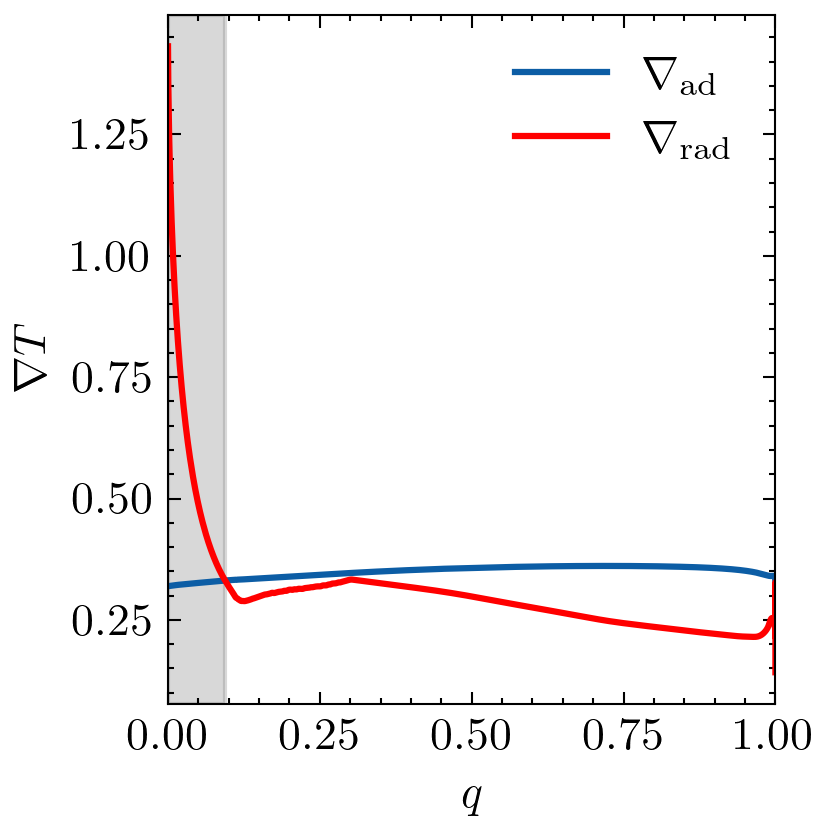

In [6]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=300, tight_layout=True)

ax.plot(data.q, data.grada, color='C0', lw=1.5, label=r'$\nabla_{\text{ad}}$')
ax.plot(data.q, data.gradr, color='r', lw=1.5, label=r'$\nabla_{\text{rad}}$')

# Shade region where q < intersection
ax.axvspan(data.q.min(), intersection, color='grey', alpha=.3, zorder=0)
ax.set_xlim(0, 1)

ax.set_xlabel(r'$q$')
ax.set_ylabel(r'$\nabla T$')
ax.legend(loc='upper right', frameon=False, fontsize=11)

fig.savefig("../plots/q21_grad.pdf", bbox_inches='tight')


### Calculate intersection

In [5]:
diff = data.grada - data.gradr
mask = (diff > 0)

intersection = data.q[mask][-1]

In [11]:
intersection

0.09444717377693918

### q-top as function of mass

In [12]:
mass = np.array([
32.057,
14.565,
31.667,
14.745,
36.387,
10.152,
25.937,
21.616,
17.451,
14.551,
34.885,
21.18,
37.405,
8.254,
12.498,
42.648,
21.918,
23.394,
8.655])

q_top = np.array([0.358,
0.172,
0.328,
0.17,
0.32,
0.12,
0.276,
0.24,
0.201,
0.17,
0.337,
0.239,
0.34,
0.0915,
0.142,
0.388,
0.245884,
0.263,
0.094])

In [13]:
def lin_model(x, a, b):
    return a * x + b

p, pcov = scipy.optimize.curve_fit(lin_model, mass, q_top)
x_fit = np.linspace(8, 42, 100)
y_fit = lin_model(x_fit, *p)

errs = np.sqrt(np.diag(pcov))

errs

array([0.00043061, 0.01071005])

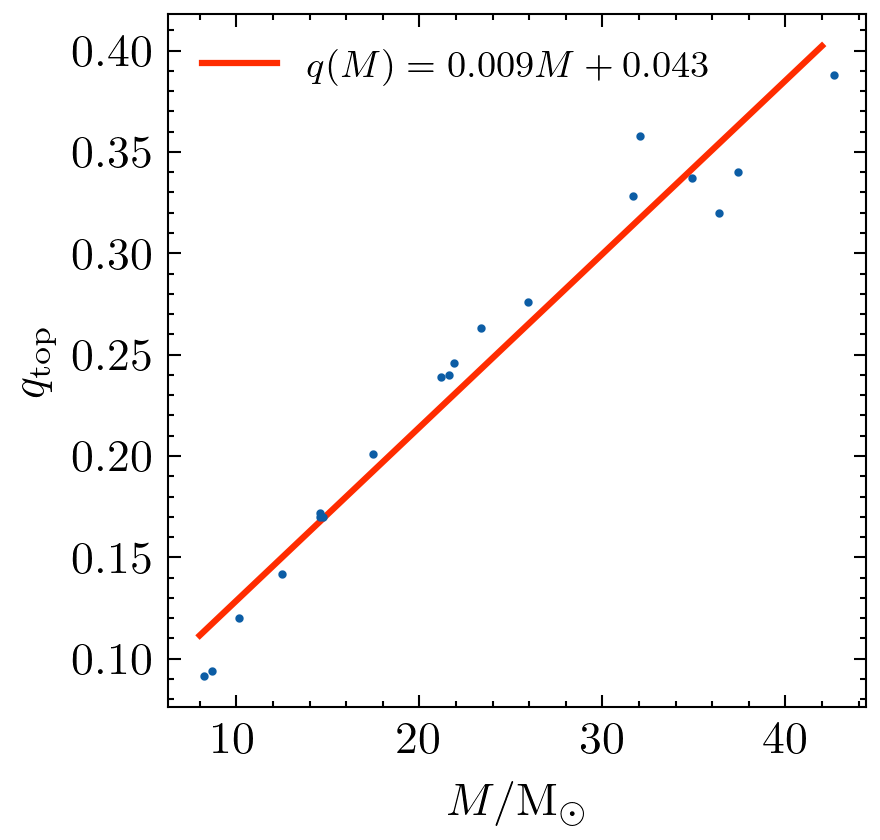

In [14]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)

ax.plot(x_fit, y_fit, color='C3', lw=1.5, label=rf'$q(M) = {p[0]:.3f}M + {p[1]:.3f}$')
ax.plot(mass, q_top, 'o', color='C0', markersize=1)
ax.legend(fontsize=9, loc='upper left', frameon=False)

ax.set_xlabel(r'$M/\text{M}_\odot$')
ax.set_ylabel(r'$q_{\text{top}}$')

fig.savefig("../plots/q22_top_fit.pdf", bbox_inches='tight')

### Q2.3 

In [15]:
big_star = mr.MesaData("8Msol_new/LOGS/history.data") # change to your path
small_star = mr.MesaData("08Msol_new/LOGS/history.data") # change to your path

#### Find point of H-exhaustion 

In [16]:
mask_H = big_star.center_h1 >= 0.01
mask_H_small = small_star.center_h1 >= 0.01

big_star_log_Teff_H = big_star.log_Teff[mask_H]
big_star_L_H = big_star.log_L[mask_H]

big_star_log_Teff_noH = big_star.log_Teff[~mask_H]
big_star_L_noH = big_star.log_L[~mask_H]

small_star_log_Teff_H = small_star.log_Teff[mask_H_small]
small_star_L_H = small_star.log_L[mask_H_small]

small_star_log_Teff_noH = small_star.log_Teff[~mask_H_small]
small_star_L_noH = small_star.log_L[~mask_H_small]

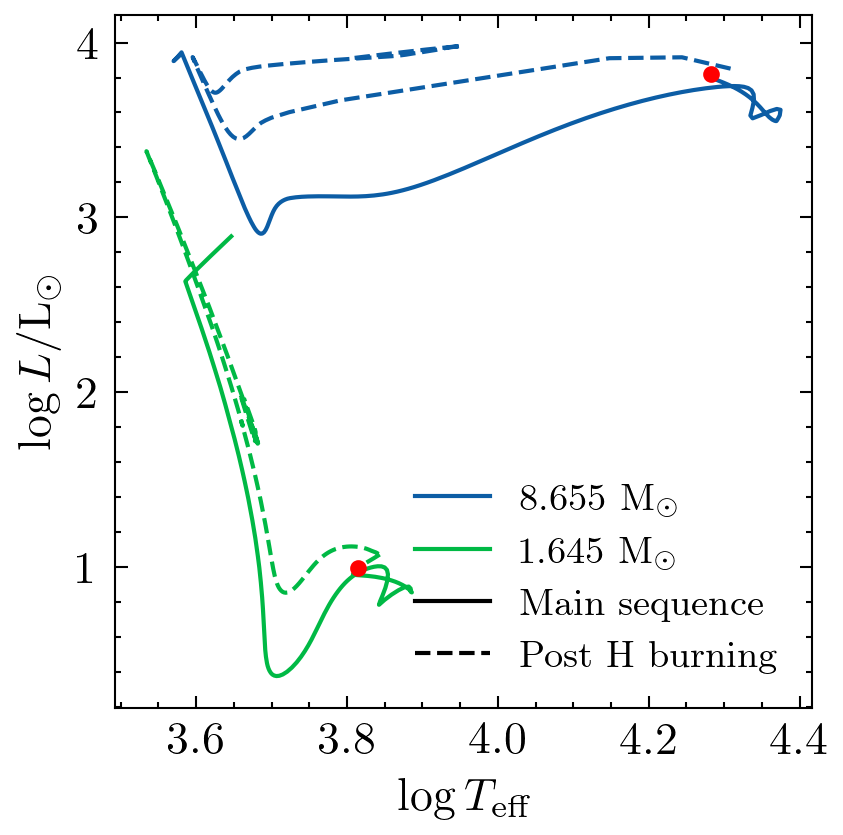

In [17]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
# Plot the big star until H is exhausted
ax.plot(big_star_log_Teff_H, big_star_L_H, color='C0', lw=1.)
ax.plot(big_star_log_Teff_noH, big_star_L_noH, color='C0', lw=1., linestyle="--")

# Plot the small star
ax.plot(small_star_log_Teff_H, small_star_L_H, color='C1', lw=1.)
ax.plot(small_star_log_Teff_noH, small_star_L_noH, color='C1', lw=1., linestyle="--")

# Mark H exhaustion points with red circles
ax.plot(big_star_log_Teff_H[-1], big_star_L_H[-1], 'o', color='r', markersize=3, label='H exhaustion')
ax.plot(small_star_log_Teff_H[-1], small_star_L_H[-1], 'o', color='r', markersize=3)

ax.set_xlabel(r'$\log T_{\text{eff}}$')
ax.set_ylabel(r'$\log L/\text{L}_\odot$')

# Custom legend: just show star names, then annotate MS/post-MS
legend_lines = [
    Line2D([0], [0], color='C0', lw=1., label='8.655 M$_\\odot$'),
    Line2D([0], [0], color='C1', lw=1., label='1.645 M$_\\odot$'),
    Line2D([0], [0], color='k', lw=1., linestyle='-', label='Main sequence'),
    Line2D([0], [0], color='k', lw=1., linestyle='--', label='Post H burning'),
]
ax.legend(handles=legend_lines, loc='lower right', frameon=False, fontsize=9)

fig.savefig("../plots/q23_H_burning.pdf", bbox_inches='tight')


### Q.2.4

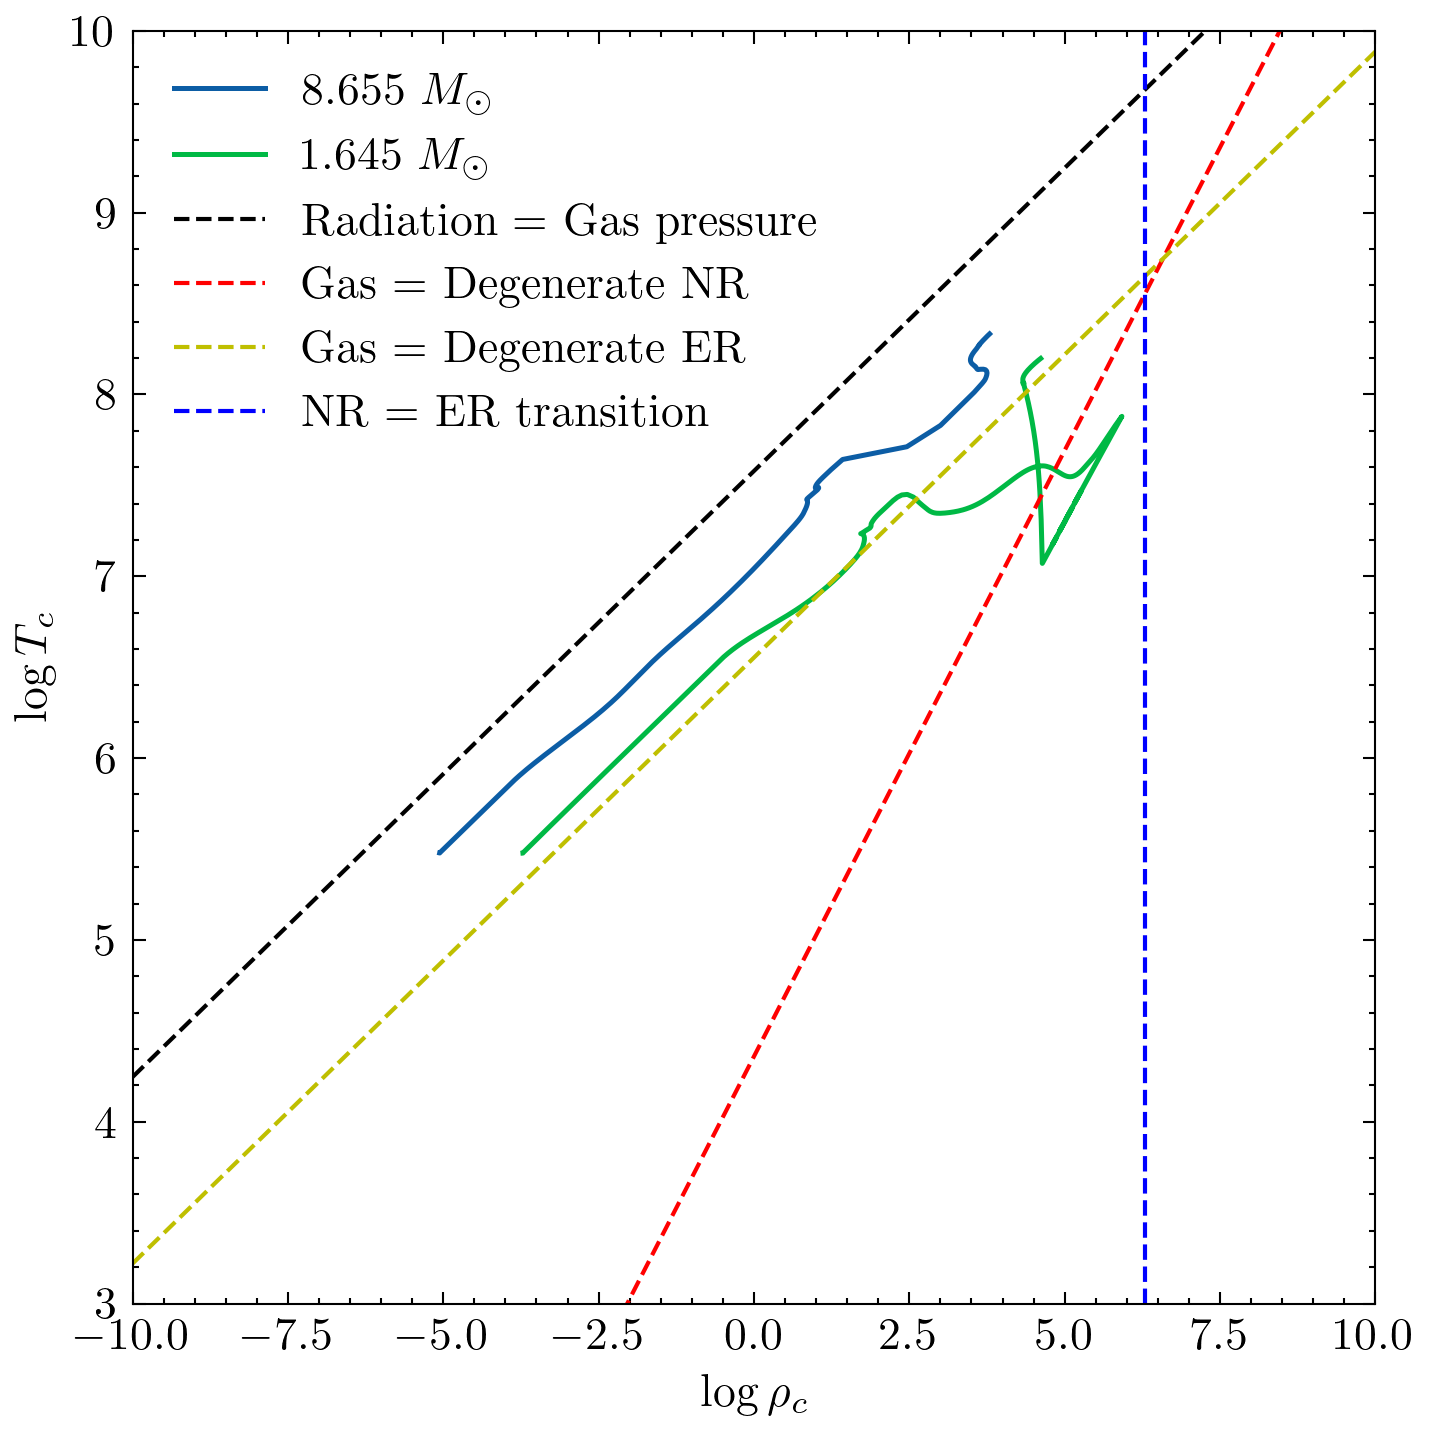

In [30]:
# Constants (you can adjust for your stellar model)
mu = 0.6     # mean molecular weight
mu_e = 2     # mean molecular weight per electron

# Rho range
log_rho = np.linspace(-10, 10, 500)
rho = 10**log_rho

# Boundary Lines
T_rad_gas = 3.2e7 * mu**(-1/3) * rho**(1/3)
T_ideal_degNR = 1.21e5 * mu * mu_e**(-5/3) * rho**(2/3)
T_ideal_degER = 1.50e7 * mu * mu_e**(-4/3) * rho**(1/3)

# Plotting
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)

# Plot evolutionary tracks (your data)
ax.plot(big_star.log_center_Rho, big_star.log_center_T, color='C0', lw=1.2, label='8.655 $M_\\odot$')
ax.plot(small_star.log_center_Rho, small_star.log_center_T, color='C1', lw=1.2, label='1.645 $M_\\odot$')

# Plot boundaries
ax.plot(log_rho, np.log10(T_rad_gas), 'k--', label='Radiation = Gas pressure')
ax.plot(log_rho, np.log10(T_ideal_degNR), 'r--', label='Gas = Degenerate NR')
ax.plot(log_rho, np.log10(T_ideal_degER), 'y--', label='Gas = Degenerate ER')
ax.axvline(np.log10(9.7e5 * mu_e), color='b', linestyle='--', label='NR = ER transition')

# Labels and legend
ax.set_xlabel(r'$\log \rho_c$')
ax.set_ylabel(r'$\log T_c$')
ax.legend()
ax.set_xlim(-10, 10)
ax.set_ylim(3, 10)

fig.tight_layout()

fig.savefig("../plots/q24_deg.pdf", bbox_inches='tight')
